# Project: No-Show Appointments Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#conclusion'>Conclusion</a></li>
</ul>

<a id='intro'></a>
<p><h3> Introduction</h3></p>
>**Dataset** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.<br>
>**Question 1** The % of No-shows based on the interval between scheduled data of appointmet and actual date of appointment, and impact of SMS_RECEIVED on No-shows.<br>
>**Question 2** Comparing hospitals which have high interval time (interval time= difference between scheduled date and appointment data) and hospitals which have low interval time. And find out which day of the week are busiest for the hospitals

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangle'></a>
<p id='#wrangle'> <h3> Data Wrangling</h3></p>
> **Loading** the dataset and adding essential coloums for exploration, and cleaning any anamolus values present in the data

In [2]:
hosp_data=pd.read_csv('C:/Users/rchak/Downloads/noshow.csv')
df=pd.DataFrame(hosp_data)

>**Adding an Interval coloumn**

In [3]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
scheduled=df['ScheduledDay'].dt.date
appointment=df['AppointmentDay'].dt.date
interval=appointment-scheduled                             # difference between scheduled date and appointment date
df['appoint_interval']=interval
df['appoint_interval']=df['appoint_interval'].astype('timedelta64[D]')

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,appoint_interval
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


> We can see that there are values where appointment date comes before scheduled date and some entries in age where age is less tan 0 which is not possible, so we are going to delete those entries

In [5]:
print(df[df['appoint_interval']<0])
print(df[df['Age']<0])

          PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
27033  7.839273e+12        5679978      M 2016-05-10 10:51:53     2016-05-09   
55226  7.896294e+12        5715660      F 2016-05-18 14:50:41     2016-05-17   
64175  2.425226e+13        5664962      F 2016-05-05 13:43:58     2016-05-04   
71533  9.982316e+14        5686628      F 2016-05-11 13:49:20     2016-05-05   
72362  3.787482e+12        5655637      M 2016-05-04 06:50:57     2016-05-03   

       Age  Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
27033   38    RESISTÊNCIA            0             0         0           0   
55226   19  SANTO ANTÔNIO            0             0         0           0   
64175   22     CONSOLAÇÃO            0             0         0           0   
71533   81  SANTO ANTÔNIO            0             0         0           0   
72362    7     TABUAZEIRO            0             0         0           0   

       Handcap  SMS_received No-show  appoint_inte

In [6]:
df.drop(df.index[[27033,55226,64175,71533,72362,99832]],inplace=True)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,appoint_interval
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


> Converting the coloums into suitable datatypes for exploration

In [8]:
df['Handcap']=df['Handcap'].astype(bool)
df['Scholarship']=df['Scholarship'].astype(bool)
df['Hipertension']=df['Hipertension'].astype(bool)
df['Diabetes']=df['Diabetes'].astype(bool)
df['Alcoholism']=df['Alcoholism'].astype(bool)
df['SMS_received']=df['SMS_received'].astype(bool)
df['sch_day']=df['ScheduledDay'].dt.dayofweek
df['app_day']=df['AppointmentDay'].dt.dayofweek

<a id='explore'></a>
### Exploration

>**variable details** <br>
**same_day:** entries where scheduled date is same as appointment date<br>
**within_week:** entries where interval between scheduled date and appointment date is less than a week but not same day<br>
**within_fortnite:** entries where interval is more than 7 day, but less than 1 days<br>
**within_month:** entries where intervals is more than 16 day, but less than 31 days<br>
**morethan_month:** entries where intervals is more than 30 days<br>

>temp, temp1 and temp2 are temporary variables which were used to provide upper limit to specify above variables


> **Question1 analysis**<br>
>Here we analyse the % No-shows for above variables and the impact of SMS_received


In [9]:
same_day=df[df['appoint_interval']==0]
temp=df[df['appoint_interval']<8]
temp1=df[df['appoint_interval']<16]
temp2=df[df['appoint_interval']<31]
within_week=temp[temp['appoint_interval']>0]
within_fortnite=temp1[temp1['appoint_interval']>7]
within_month=temp2[temp2['appoint_interval']>15]
morethan_month=df[df['appoint_interval']>30]


In [10]:
def noshow(data):
    no_show=data[data['No-show']=='Yes']
    len_noshow=len(no_show)
    percent=(len_noshow/len(data))*100
    return percent
def sms_noshow(data):
    sms=data[data['SMS_received']==True]
    no_show=sms[sms['No-show']=='Yes']
    percent=(len(no_show)/len(data))*100
    return percent
def nosms_noshow(data):
    sms=data[data['SMS_received']==False]
    no_show=sms[sms['No-show']=='Yes']
    percent=(len(no_show)/len(data))*100
    return percent
def nosms_show(data):
    sms=data[data['SMS_received']==False]
    no_show=sms[sms['No-show']=='No']
    percent=(len(no_show)/len(data))*100
    return percent
def sms_show(data):
    sms=data[data['SMS_received']==True]
    no_show=sms[sms['No-show']=='No']
    percent=(len(no_show)/len(data))*100
    return percent
def sms_sent(data):
    sms=data[data['SMS_received']==True]
    return (len(sms)/len(data))*100
   

In [11]:
dframe=pd.DataFrame(
    data={'same day':[sms_sent(same_day),noshow(same_day),sms_show(same_day),sms_noshow(same_day),nosms_noshow(same_day),nosms_show(same_day)],
     'within week':[sms_sent(within_week),noshow(within_week),sms_show(within_week),sms_noshow(within_week),nosms_noshow(within_week),nosms_show(within_week)],
     'within fortnite':[sms_sent(within_fortnite),noshow(within_fortnite),sms_show(within_fortnite),sms_noshow(within_fortnite),nosms_noshow(within_fortnite),nosms_show(within_fortnite)],
     'within month':[sms_sent(within_month),noshow(within_month),sms_show(within_month),sms_noshow(within_month),nosms_noshow(within_month),nosms_show(within_month)],
     'morethan month':[sms_sent(morethan_month),noshow(morethan_month),sms_show(morethan_month),sms_noshow(morethan_month),nosms_noshow(morethan_month),nosms_show(morethan_month)]},
    index=['%sms sent','%noshow','%sms+show','%sms+noshow','%nosms+noshow','%nosms+show']
)

>**Index Values**<br>
**%sms sent**: the percent values for sent sent for the coloumns<br>
**% noshow**: the percent values of No-shows for the coloumns<br>
**%sms + show**: the percent values where sms is sent and the patients showed up for appointments<br>
**%sms +noshow**: the percent values where sms is sent but patients were No-shows<br>
**%nosms+noshow** the percent values where no sms were sent and patients didnt show up<br>
**%nosms+show**  the percent values where no sms was sent but patients sowed up for appointment<br>

In [12]:
dframe=dframe[['same day','within week','within fortnite','within month','morethan month']] #arranging the dataframe


In [42]:
dframe

,same day,within week,within fortnite,within month,morethan month
%sms sent,0.000000,35.880068,58.596984,60.480212,61.765273
%noshow,4.647062,24.147895,30.795387,32.511974,33.002505
%sms+show,0.000000,27.354358,41.927853,42.525838,43.110426
%sms+noshow,0.000000,8.525711,16.669131,17.954374,18.654847
%nosms+noshow,4.647062,15.622184,14.126257,14.557600,14.347659
%nosms+show,95.352938,48.497747,27.276759,24.962188,23.887069


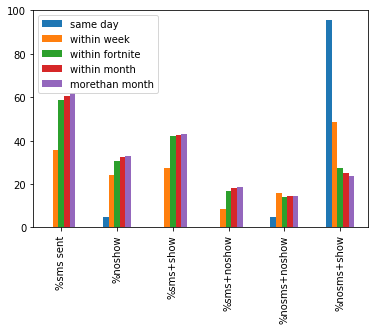

In [13]:
dframe.plot(kind='bar')

>**Question2 analysis**<br>
Here we analyse the busiest hospitals where more than **1000** appointments were made, top 5 Hospitals which has a mean for interval time and top 5 hospital with low mean interval time are considered here, and analyse their No-show percent and effect of SMS. And find the which days of the week are busiest.

In [14]:
neighbour=df.groupby('Neighbourhood')

In [15]:
nei=neighbour.describe()

In [16]:
temp_x=nei['appoint_interval']

In [17]:
temp_y=temp_x[temp_x['count']>1000]

In [18]:
high_mean=temp_y.sort_values('mean',ascending=False)

In [19]:
low_mean=temp_y.sort_values('mean',ascending=True)

In [20]:
high_mean.head()

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,,,,,,,,
JARDIM CAMBURI,7717.0,18.761306,26.516377,0.0,0.0,4.0,36.0,112.0
MARUÍPE,1902.0,16.430074,27.213828,0.0,0.0,6.0,23.0,179.0
MARIA ORTIZ,5805.0,13.367442,14.895948,0.0,0.0,5.0,30.0,102.0
ILHA DE SANTA MARIA,1885.0,12.991512,17.108959,0.0,0.0,6.0,26.0,108.0
JOANA D´ARC,1427.0,12.925018,17.780274,0.0,0.0,3.0,23.0,91.0


In [21]:
low_mean.head()

,count,mean,std,min,25%,50%,75%,max
Neighbourhood,,,,,,,,
NOVA PALESTINA,2264.0,4.745583,8.310838,0.0,0.0,1.0,7.0,88.0
ILHA DAS CAIEIRAS,1071.0,5.031746,6.411797,0.0,0.0,4.0,7.0,66.0
SÃO PEDRO,2448.0,5.411765,8.663131,0.0,0.0,3.0,7.0,95.0
ILHA DO PRÍNCIPE,2266.0,5.695940,6.453006,0.0,0.0,6.0,9.0,105.0
GURIGICA,2018.0,6.166006,9.431521,0.0,0.0,2.0,9.0,109.0


In [22]:
jardim_camburi=df[df['Neighbourhood']=='JARDIM CAMBURI']
maria_ortiz=df[df['Neighbourhood']=='MARIA ORTIZ']
resistencia=df[df['Neighbourhood']=='RESISTÊNCIA']
jardim_da_penha=df[df['Neighbourhood']=='RESISTÊNCIA']
itarare=df[df['Neighbourhood']=='ITARARÉ']


In [23]:
nova_palestina=df[df['Neighbourhood']=='NOVA PALESTINA']
ilha_das_caieiras=df[df['Neighbourhood']=='ILHA DAS CAIEIRAS']
sao_pedro=df[df['Neighbourhood']=='SÃO PEDRO']
ilha_do_principe=df[df['Neighbourhood']=='ILHA DO PRÍNCIPE']
gurigica=df[df['Neighbourhood']=='GURIGICA']


In [24]:
high_mean_interval=pd.DataFrame(
    data={'jardim_camburi':[sms_sent(jardim_camburi),noshow(jardim_camburi),sms_show(jardim_camburi),sms_noshow(jardim_camburi),nosms_noshow(jardim_camburi),nosms_show(jardim_camburi)],
     'maria_ortiz':[sms_sent(maria_ortiz),noshow(maria_ortiz),sms_show(maria_ortiz),sms_noshow(maria_ortiz),nosms_noshow(maria_ortiz),nosms_show(maria_ortiz)],
     'resistencia':[sms_sent(resistencia),noshow(resistencia),sms_show(resistencia),sms_noshow(resistencia),nosms_noshow(resistencia),nosms_show(resistencia)],
     'jardim_da_penha':[sms_sent(jardim_da_penha),noshow(jardim_da_penha),sms_show(jardim_da_penha),sms_noshow(jardim_da_penha),nosms_noshow(jardim_da_penha),nosms_show(jardim_da_penha)],
     'itarare':[sms_sent(itarare),noshow(itarare),sms_show(itarare),sms_noshow(itarare),nosms_noshow(itarare),nosms_show(itarare)]},
    index=['%sms sent','%noshow','%sms+show','%sms+noshow','%nosms+noshow','%nosms+show']
)

In [25]:
low_mean_interval=pd.DataFrame(
    data={'nova_palestina':[sms_sent(nova_palestina),noshow(nova_palestina),sms_show(nova_palestina),sms_noshow(nova_palestina),nosms_noshow(nova_palestina),nosms_show(nova_palestina)],
     'ilha_das_caieiras':[sms_sent(ilha_das_caieiras),noshow(ilha_das_caieiras),sms_show(ilha_das_caieiras),sms_noshow(ilha_das_caieiras),nosms_noshow(ilha_das_caieiras),nosms_show(ilha_das_caieiras)],
     'sao_pedro':[sms_sent(sao_pedro),noshow(sao_pedro),sms_show(sao_pedro),sms_noshow(sao_pedro),nosms_noshow(sao_pedro),nosms_show(sao_pedro)],
     'ilha_do_principe':[sms_sent(ilha_do_principe),noshow(ilha_do_principe),sms_show(ilha_do_principe),sms_noshow(ilha_do_principe),nosms_noshow(ilha_do_principe),nosms_show(ilha_do_principe)],
     'gurigica':[sms_sent(gurigica),noshow(gurigica),sms_show(gurigica),sms_noshow(gurigica),nosms_noshow(gurigica),nosms_show(gurigica)]},
    index=['%sms sent','%noshow','%sms+show','%sms+noshow','%nosms+noshow','%nosms+show']
)

In [26]:
l_sms=low_mean_interval.iloc[0].mean()
l_noshow=low_mean_interval.iloc[1].mean()
l_sms_show=low_mean_interval.iloc[2].mean()
l_sms_noshow=low_mean_interval.iloc[3].mean()
l_nosms_noshow=low_mean_interval.iloc[4].mean()
l_nosms_show=low_mean_interval.iloc[5].mean()

In [27]:
h_sms=high_mean_interval.iloc[0].mean()
h_noshow=high_mean_interval.iloc[1].mean()
h_sms_show=high_mean_interval.iloc[2].mean()
h_sms_noshow=high_mean_interval.iloc[3].mean()
h_nosms_noshow=high_mean_interval.iloc[4].mean()
h_nosms_show=high_mean_interval.iloc[5].mean()

In [28]:
pframe=pd.DataFrame(
data={'high_interval':[h_sms,h_noshow,h_sms_show,h_sms_noshow,h_nosms_noshow,h_nosms_show],
      'low_interval':[l_sms,l_noshow,l_sms_show,l_sms_noshow,l_nosms_noshow,l_nosms_show]
    
},
index=['sms_sent','%noshow','sms+show','sms+noshow','nosms+noshow','nosms+show'])

In [29]:
pframe

,high_interval,low_interval
sms_sent,34.034210,28.929559
%noshow,21.421470,21.362000
sms+show,23.721463,19.967631
sms+noshow,10.312747,8.961928
nosms+noshow,11.108723,12.400071
nosms+show,54.857067,58.670370


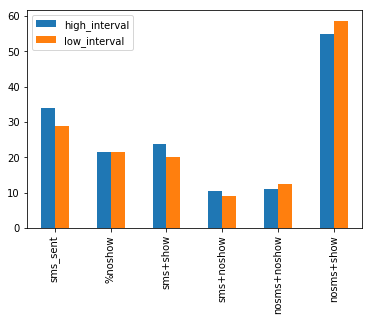

In [30]:
pframe.plot(kind='bar')

In [31]:
high=[jardim_camburi,maria_ortiz,resistencia,jardim_da_penha,itarare]

In [32]:
low=[nova_palestina,ilha_das_caieiras,sao_pedro,ilha_do_principe,gurigica]

In [33]:
hig=pd.concat(high)

In [34]:
lo=pd.concat(low)

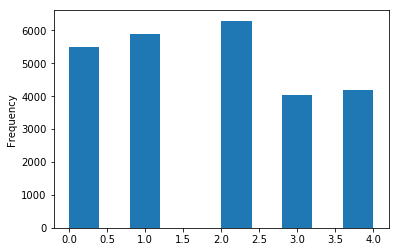

In [38]:
hig.app_day.plot(kind='hist')

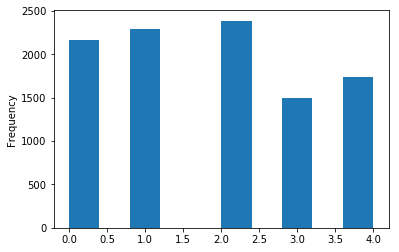

In [39]:
lo.app_day.plot(kind='hist')

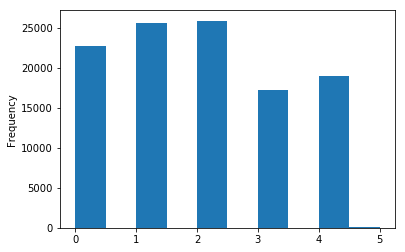

In [40]:
df.app_day.plot(kind='hist')

<a id='conclusion'></a>
### Conclusion



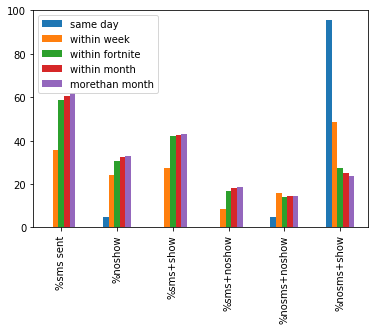

In [41]:
dframe.plot(kind='bar')

>**Question 1** From the above plot the following can be concluded<br>
>1. Appointments scheduled on the same day are most likely to show up as they have 95.35% show up percent, this can be slightly improved but sending out SMS to patients, but there may not be a considerable difference because there is a considerable (10-20%) noshows in other intervals where sms is sent and yet patients didn't show up.

>2. It can be seen that no show % increase as interval increases and nosms+show % desreases as interval increases, but there is not much increase in sms sent percent in categories within fortnite, within month and morethan month. So more sms should be sent to anyone who is scheduling appointment after the same day.


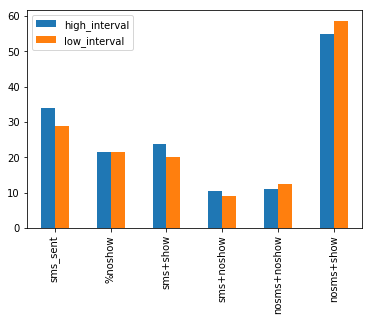

In [43]:
pframe.plot(kind='bar')

>**Question 2** from the above plot it can be concluded that:<br>
>1. Hospitals with high appointment interval has almost same no show percent as hospitals with low appointment interval, therefore it is safe to say that length if interval has negligibe effect on %no show
>2. nosms+show % were higher for both type of hospitals than sms_show %, therefore sending SMS may not be the perfect way to remind the patients about the appointments. Some other ways should be employed to remind patients of their appointments.


>** Day of Week which are busiest**

Axes(0.125,0.125;0.775x0.755)


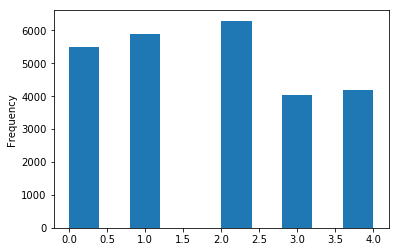

In [46]:
print(hig.app_day.plot(kind='hist'))  #hospitals with high interval gap between scheduled day and appointment day


Axes(0.125,0.125;0.775x0.755)


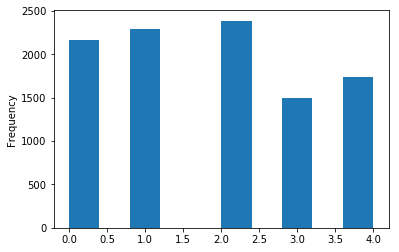

In [47]:
print(lo.app_day.plot(kind='hist'))   #hospitals with low interval gap between scheduled day and appointment day

Axes(0.125,0.125;0.775x0.755)


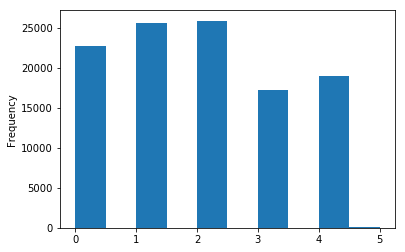

In [48]:
print(df.app_day.plot(kind='hist'))       #average busiest day for all hospitals

>It is be seen that, hospitals with high interval gap , hospitals with low interval gap were very similar, which is also similar to all hospitals on an avaerage<br>
>Mondays, Tuesday and Wednesdays are the busiest days for most hospitals and Thrusday, Friday is significantly more free. Very negligibe people have appointments on Saturday and there were no appointments made on Sunday